# Preparing MNIST data set for digit recognision via NN

In [1]:
from pathlib import Path
import sys
#Set root to be the main project folder
root = Path.cwd().parent.parent
print(root)
py_path = Path(root/'Code/py_files')
print(py_path)
data_path = Path(root/'Data')
print(data_path)

#Add location of py files to path so we can import
sys.path.insert(0,str(py_path))

/home/gnacikm/Documents/GitHub/FeedforwardNeuralNetwork
/home/gnacikm/Documents/GitHub/FeedforwardNeuralNetwork/Code/py_files
/home/gnacikm/Documents/GitHub/FeedforwardNeuralNetwork/Data


In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

**mnist** is dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage: https://keras.io/api/datasets/mnist/

### Loading the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
y_train[0]

5

### Ploting the digits

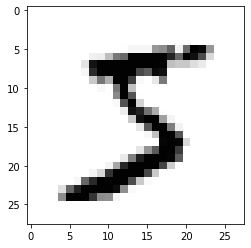

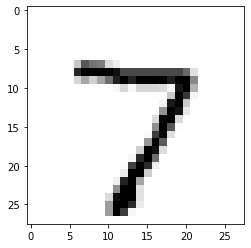

In [6]:
plt.imshow(X_train[0], cmap="Greys")
plt.show()
plt.imshow(X_test[0], cmap="Greys")
plt.show()

### Preparing the data for training

In [7]:
X_train = X_train[:]/255
X_test = X_test[:]/255

In [8]:
n1 = X_train.shape[0]
n2 = X_test.shape[0]

In [9]:
flatten_size = X_train[0].flatten().size
flatten_size

784

In [10]:
X_train =  np.array([X_train[k].flatten() for k in range(n1)])
X_test=  np.array([X_test[k].flatten() for k in range(n2)])

In [11]:
numb_digits = 10#because we have y_values.size digits, and we wish to have a class matrix
y_train = to_categorical(y_train, numb_digits)
y_test =  to_categorical(y_test, numb_digits)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

### Exporting the data set as npz file
https://numpy.org/doc/stable/reference/generated/numpy.savez.html

In [13]:
np.savez(data_path/"mnist_data_set/data_mnist.npz",  **{"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test,})

### Checking the exported file

In [14]:
npzfile = np.load(data_path/"mnist_data_set/data_mnist.npz")
npzfile.files

['X_train', 'y_train', 'X_test', 'y_test']